# Data Summarization

In [42]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
# Setup matplotlib to show graphs inline in the notebook
%matplotlib inline


In [43]:
# Load the data
gdp_df = pd.read_csv('data/cleaned_gdp.csv')
employment_df = pd.read_csv('data/cleaned_employment_by_industry.csv')
graduates_df = pd.read_csv('data/cleaned_graduates.csv')

## GDP

GDP DataFrame - First few rows:


,Date,NAICS,Value,Value Binned
0,2000,Accommodation and food services [72],22863000000,"(21000000000.0, 49000000000.0]"
1,2000,"Agriculture, forestry, fishing and hunting [11]",23120000000,"(21000000000.0, 49000000000.0]"
2,2000,Construction [23],51054000000,"(49000000000.0, 76000000000.0]"
3,2000,Educational services [61],51839000000,"(49000000000.0, 76000000000.0]"
4,2000,Finance and insurance [52],62648000000,"(49000000000.0, 76000000000.0]"


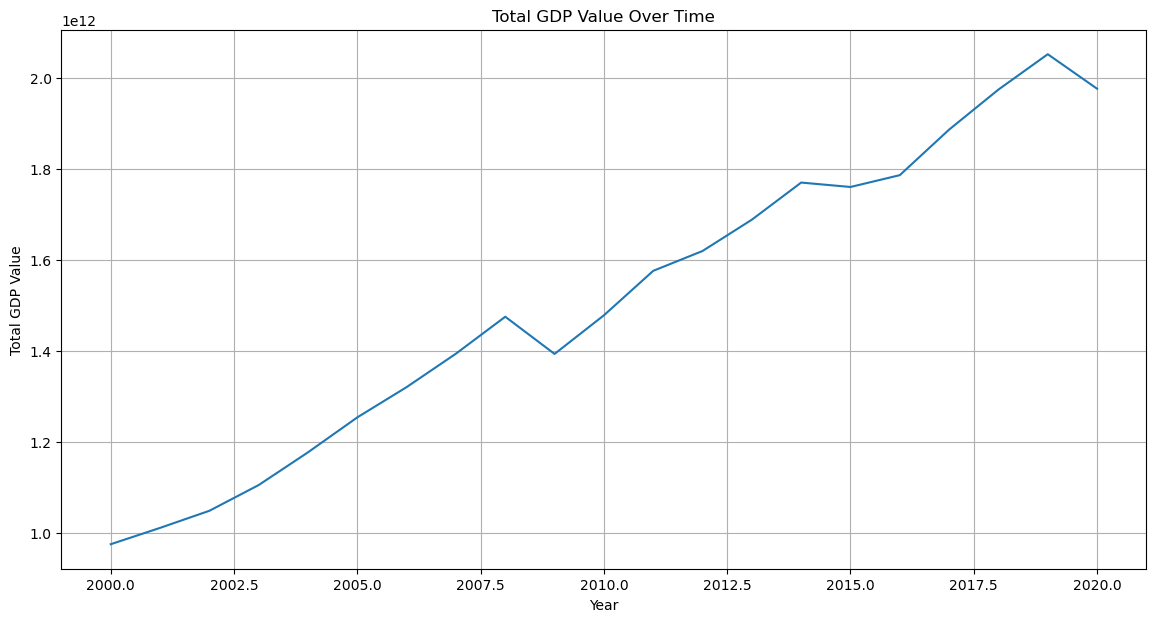

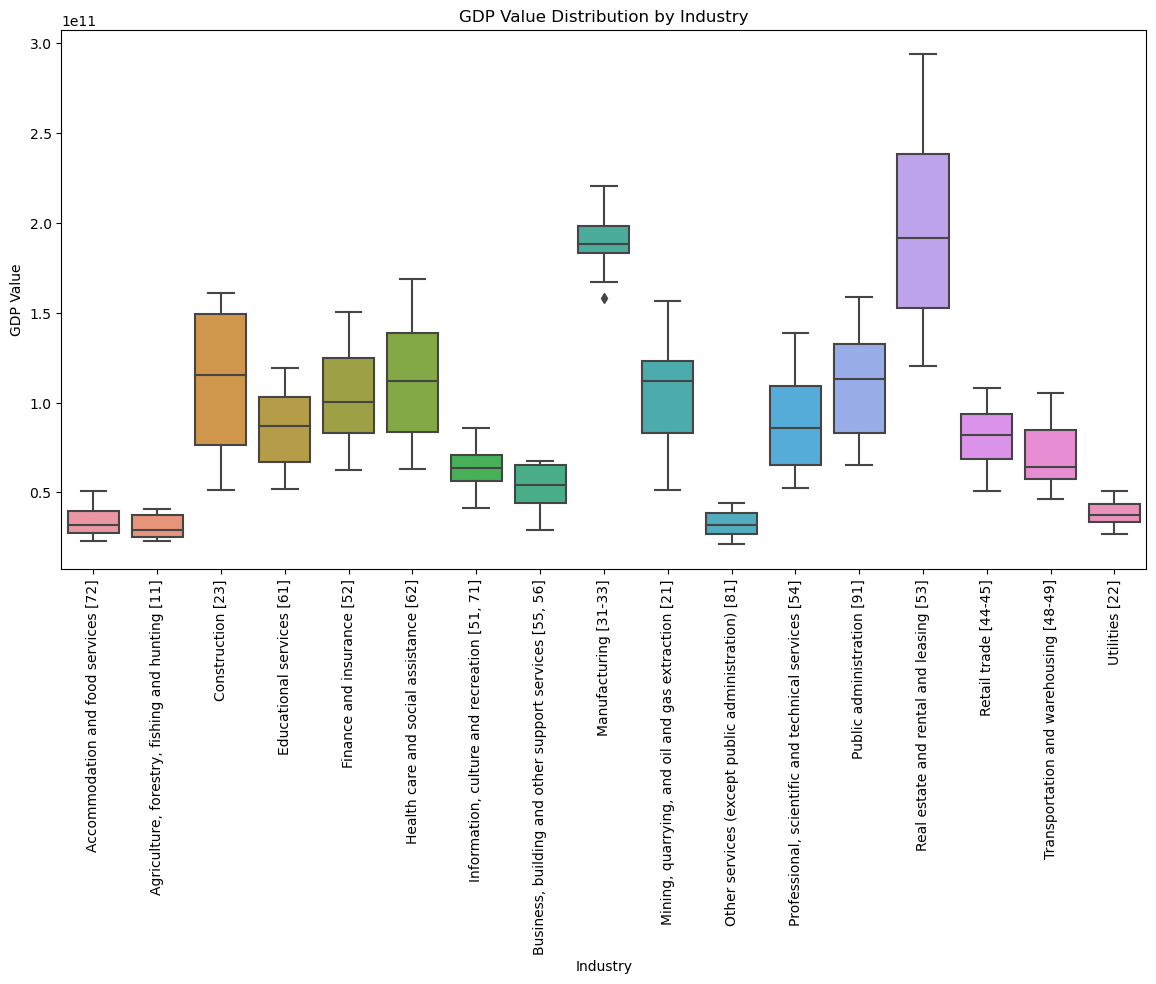

In [44]:
# Display the first few rows of the DataFrame
print("GDP DataFrame - First few rows:")
display(gdp_df.head())

# Plot the distribution of GDP values ('Value') over the years ('Date')
plt.figure(figsize=(14, 7))
sns.lineplot(data=gdp_df, x='Date', y='Value', estimator='sum', ci=None)
plt.title('Total GDP Value Over Time')
plt.xlabel('Year')
plt.ylabel('Total GDP Value')
plt.grid(True)
plt.show()

# Plot the distribution of GDP values across different industries ('NAICS')
plt.figure(figsize=(14, 7))
sns.boxplot(data=gdp_df, x='NAICS', y='Value')
plt.title('GDP Value Distribution by Industry')
plt.xlabel('Industry')
plt.ylabel('GDP Value')
plt.xticks(rotation=90)
plt.show()

## Employment

Employment DataFrame - First few rows:


,Date,Labour Force Characteristics,NAICS,Gender,Age Group,Value
0,2000,Employed,Accommodation and food services [72],Female,15 to 24 years,235000
1,2000,Employed,Accommodation and food services [72],Female,25 to 54 years,285400
2,2000,Employed,Accommodation and food services [72],Female,55 years and over,37700
3,2000,Employed,Accommodation and food services [72],Male,15 to 24 years,160900
4,2000,Employed,Accommodation and food services [72],Male,25 to 54 years,193500


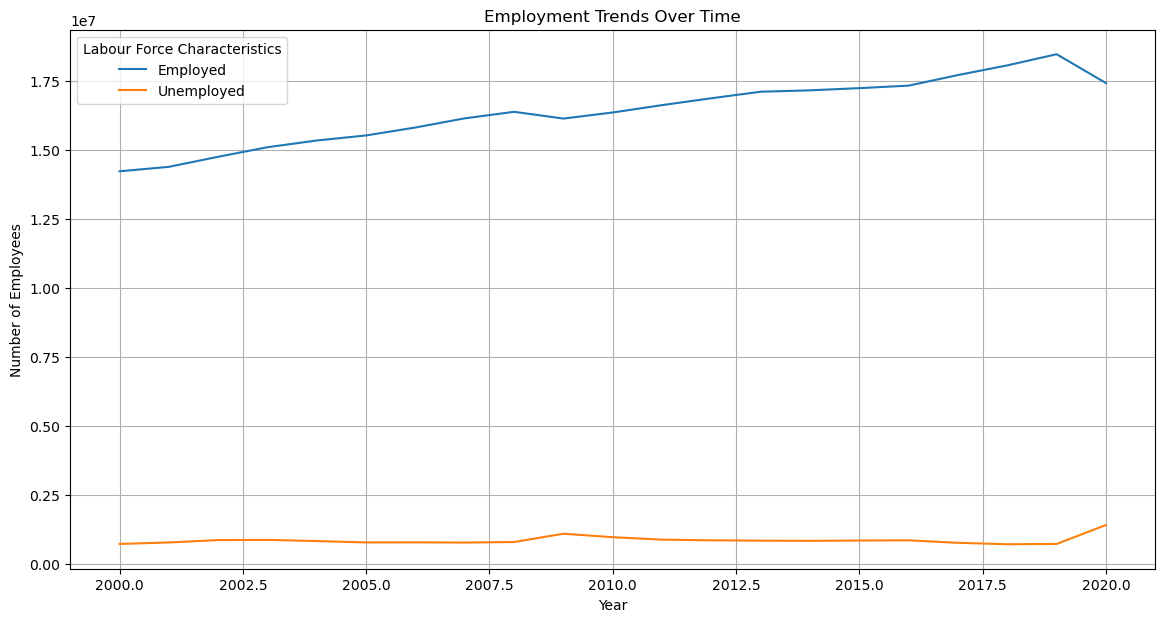

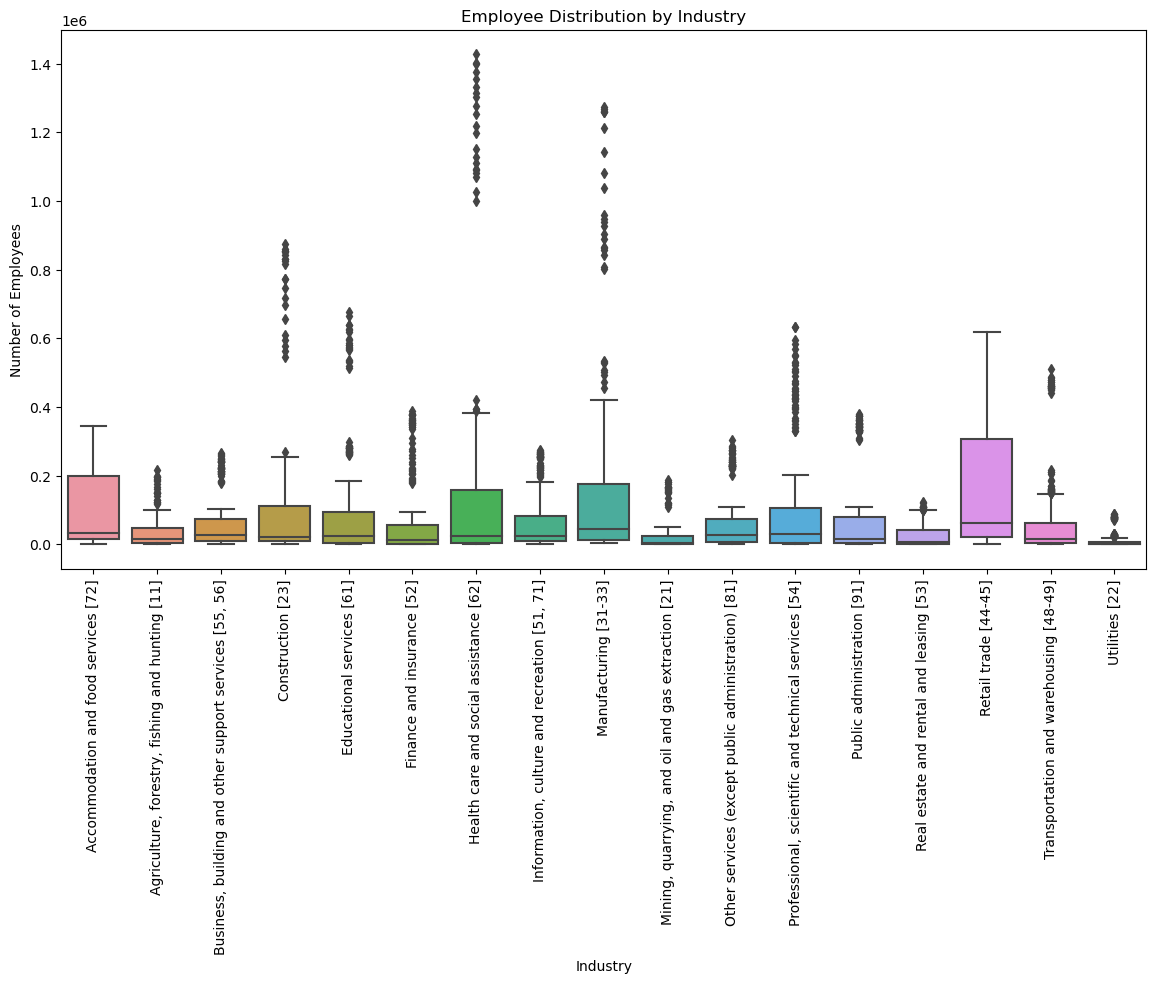

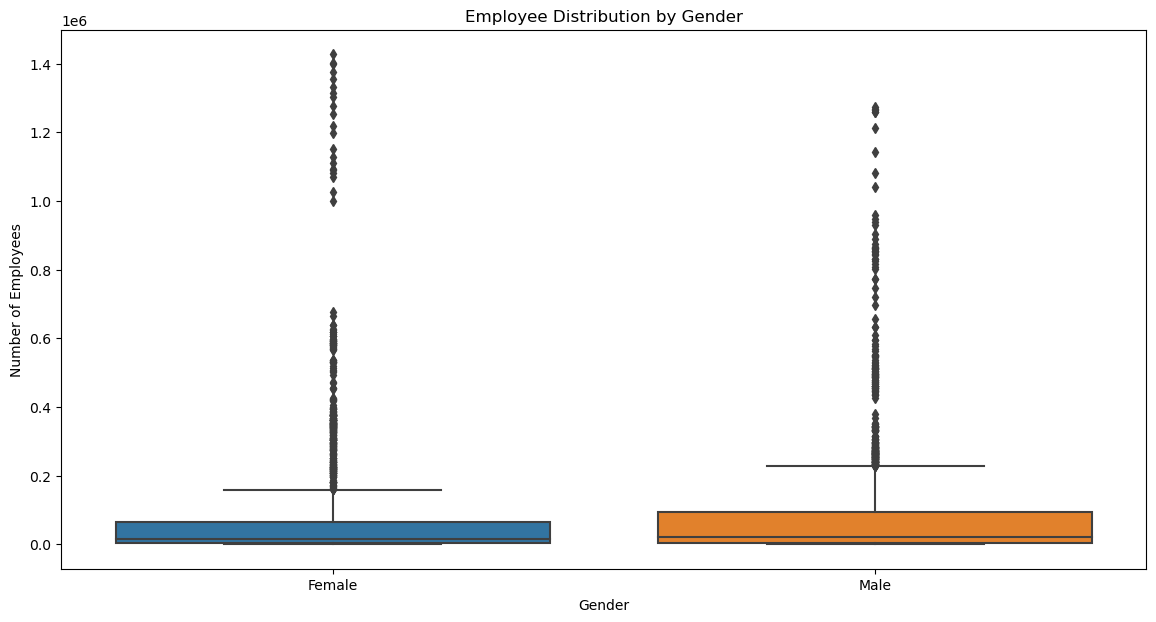

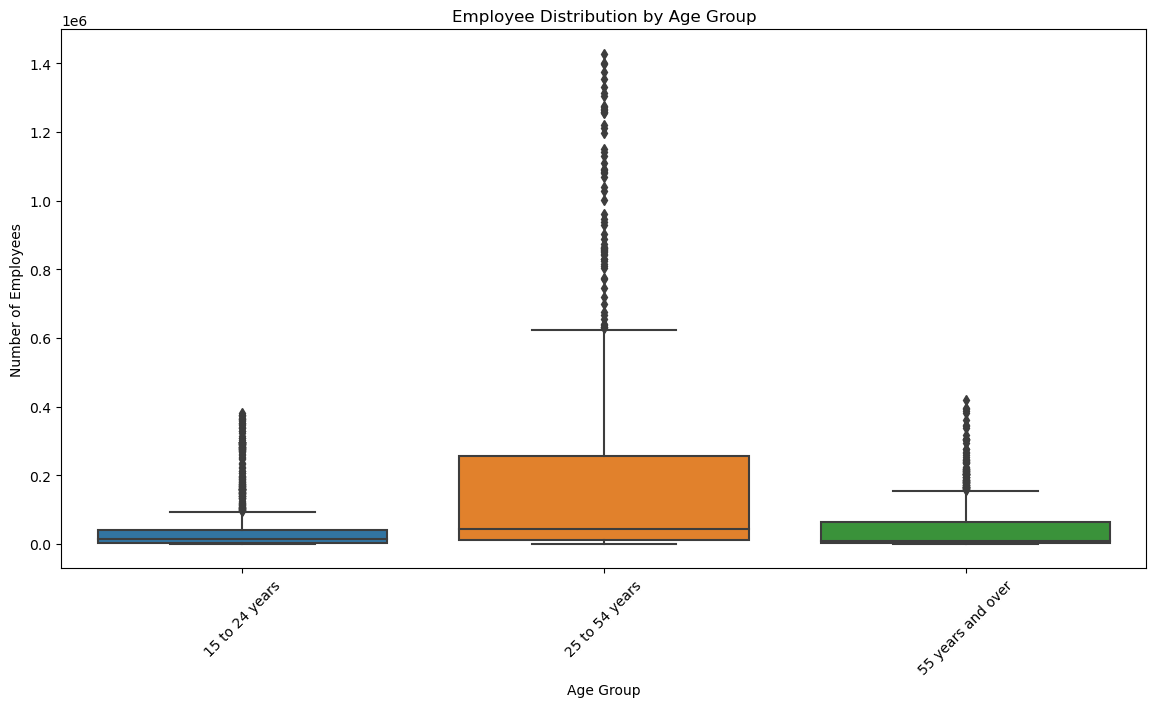

In [45]:
print("Employment DataFrame - First few rows:")
display(employment_df.head())

# Plot the number of employees over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=employment_df, x='Date', y='Value', hue='Labour Force Characteristics', estimator='sum', ci=None)
plt.title('Employment Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Employees')
plt.grid(True)
plt.show()

# Plot the distribution of employees by industry
plt.figure(figsize=(14, 7))
sns.boxplot(data=employment_df, x='NAICS', y='Value')
plt.title('Employee Distribution by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Employees')
plt.xticks(rotation=90)
plt.show()

# Plot the distribution of employees by gender
plt.figure(figsize=(14, 7))
sns.boxplot(data=employment_df, x='Gender', y='Value')
plt.title('Employee Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Employees')
plt.show()

# Plot the distribution of employees by age group
plt.figure(figsize=(14, 7))
sns.boxplot(data=employment_df, x='Age Group', y='Value')
plt.title('Employee Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()


## Graduates

Graduates DataFrame - First few rows:


,Date,Field Of Study,Gender,Value,Value Binned
0,2000,"Agriculture, natural resources and conservatio...",Man,7818.0,"(0.0, 16247.1]"
1,2000,"Agriculture, natural resources and conservatio...",Woman,6390.0,"(0.0, 16247.1]"
2,2000,"Architecture, engineering and related technolo...",Man,52596.0,"(48717.3, 64952.4]"
3,2000,"Architecture, engineering and related technolo...",Woman,12987.0,"(0.0, 16247.1]"
4,2000,"Business, management and public administration...",Man,49608.0,"(48717.3, 64952.4]"


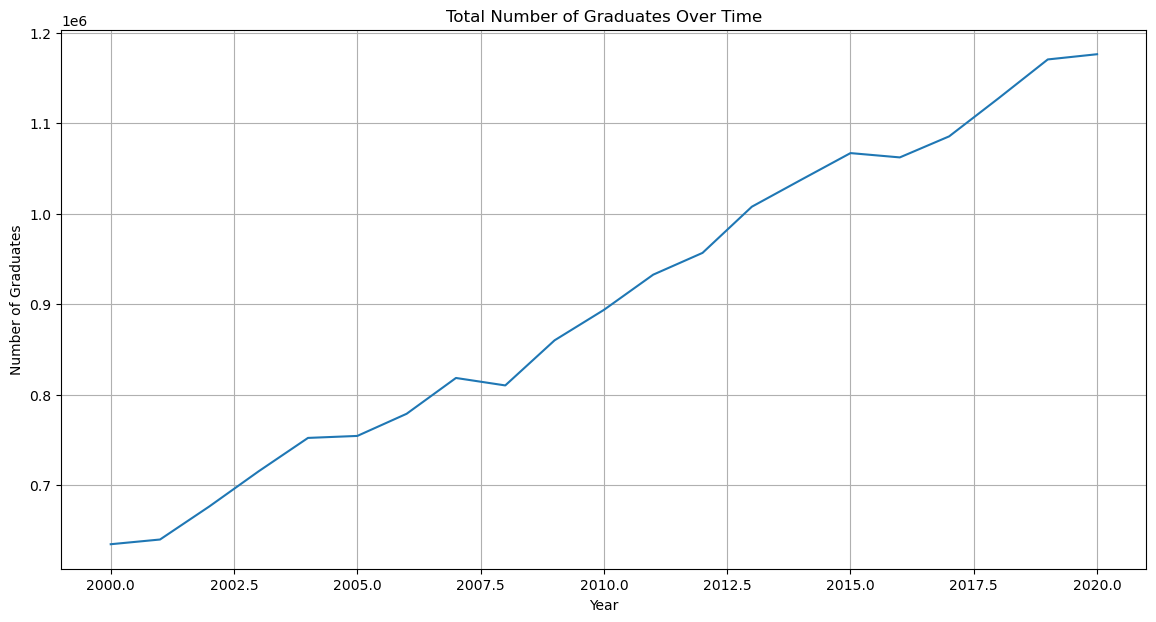

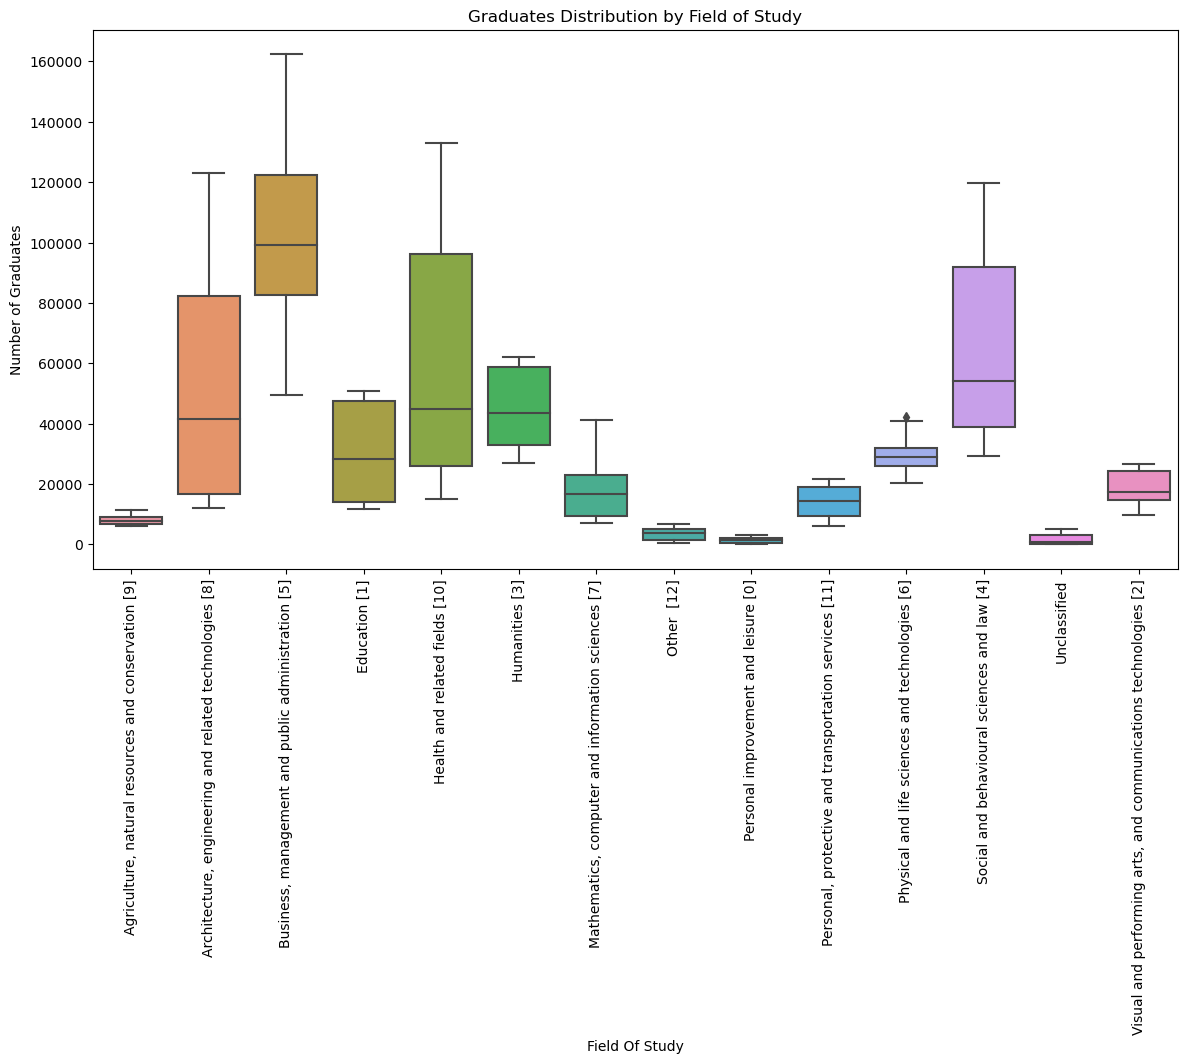

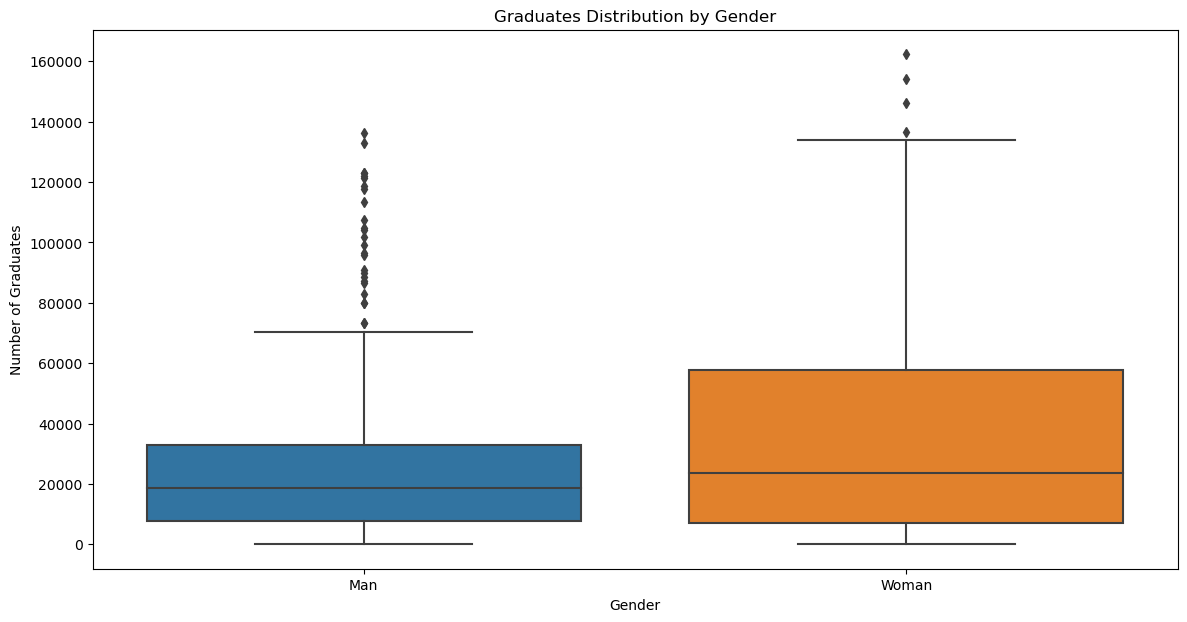

In [46]:
print("Graduates DataFrame - First few rows:")
display(graduates_df.head())

# Plot the number of graduates over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=graduates_df, x='Date', y='Value', estimator='sum', ci=None)
plt.title('Total Number of Graduates Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Graduates')
plt.grid(True)
plt.show()

# Plot the distribution of graduates by field of study
plt.figure(figsize=(14, 7))
sns.boxplot(data=graduates_df, x='Field Of Study', y='Value')
plt.title('Graduates Distribution by Field of Study')
plt.xlabel('Field Of Study')
plt.ylabel('Number of Graduates')
plt.xticks(rotation=90)
plt.show()

# Plot the distribution of graduates by gender
plt.figure(figsize=(14, 7))
sns.boxplot(data=graduates_df, x='Gender', y='Value')
plt.title('Graduates Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Graduates')
plt.show()

# Data Processing

## Missing Values

In [47]:
# All missing values were handled in the previous phase

## Categorial Attributes

### GDP

In [48]:
# No categorical encoding required for the GDP dataset at this stage
# `NAICS` is not encoded due to its high cardinality (many unique values),
# which would lead to a large increase in feature dimensionality potentially causing computational inefficiency and model overfitting.

### Employment

In [49]:
# Initialize the OneHotEncoder without dropping any categories
employment_encoder = OneHotEncoder(sparse=False)

# Select the columns to encode
employment_categorical = ['Labour Force Characteristics', 'Gender', 'Age Group']

# Fit and transform the categorical columns
employment_encoded_data = employment_encoder.fit_transform(employment_df[employment_categorical])

# Create a DataFrame with the encoded variables, converting floats to integers for better readability
employment_encoded_df = pd.DataFrame(employment_encoded_data, 
                                     columns=employment_encoder.get_feature_names_out(employment_categorical)).astype(int)

# Concatenate the encoded_df with the original df, dropping the original categorical columns
employment_df_encoded = pd.concat([employment_df.drop(employment_categorical, axis=1), employment_encoded_df], axis=1)

# Display the first few rows of the new DataFrame with encoded variables
display(employment_df_encoded.head())

# Note on not encoding NAICS and Field of Study:
# `NAICS` and `Field of Study` are not encoded due to their high cardinality (many unique values),
# which would lead to a large increase in feature dimensionality potentially causing computational inefficiency and model overfitting.

,Date,NAICS,Value,Labour Force Characteristics_Employed,Labour Force Characteristics_Unemployed,Gender_Female,Gender_Male,Age Group_15 to 24 years,Age Group_25 to 54 years,Age Group_55 years and over
0,2000,Accommodation and food services [72],235000,1,0,1,0,1,0,0
1,2000,Accommodation and food services [72],285400,1,0,1,0,0,1,0
2,2000,Accommodation and food services [72],37700,1,0,1,0,0,0,1
3,2000,Accommodation and food services [72],160900,1,0,0,1,1,0,0
4,2000,Accommodation and food services [72],193500,1,0,0,1,0,1,0


### Graduates

In [50]:
# Initialize the OneHotEncoder without dropping any categories
graduates_encoder = OneHotEncoder(sparse=False)

# Select the column to encode
graduates_categorical = ['Gender']

# Fit and transform the categorical column
graduates_encoded_data = graduates_encoder.fit_transform(graduates_df[graduates_categorical])

# Create a DataFrame with the encoded variables, converting floats to integers for better readability
graduates_encoded_df = pd.DataFrame(graduates_encoded_data, 
                                     columns=graduates_encoder.get_feature_names_out(graduates_categorical)).astype(int)

# Concatenate the encoded_df with the original df, dropping the original categorical columns
graduates_df_encoded = pd.concat([graduates_df.drop(graduates_categorical, axis=1), graduates_encoded_df], axis=1)

# Display the first few rows of the new DataFrame with encoded variables
display(graduates_df_encoded.head())

# Note on not encoding Field of Study:
# `Field of Study` is not encoded due to its potentially high cardinality,
# which could lead to a large increase in feature dimensionality potentially causing computational inefficiency and model overfitting.

,Date,Field Of Study,Value,Value Binned,Gender_Man,Gender_Woman
0,2000,"Agriculture, natural resources and conservatio...",7818.0,"(0.0, 16247.1]",1,0
1,2000,"Agriculture, natural resources and conservatio...",6390.0,"(0.0, 16247.1]",0,1
2,2000,"Architecture, engineering and related technolo...",52596.0,"(48717.3, 64952.4]",1,0
3,2000,"Architecture, engineering and related technolo...",12987.0,"(0.0, 16247.1]",0,1
4,2000,"Business, management and public administration...",49608.0,"(48717.3, 64952.4]",1,0


## Normalization of numeric attributes

In [51]:
scaler = StandardScaler()

# Normalize the 'Value' column in the GDP DataFrame
gdp_df['Value'] = scaler.fit_transform(gdp_df[['Value']])

# Normalize the 'Value' column in the Employment DataFrame
employment_df['Value'] = scaler.fit_transform(employment_df[['Value']])

# Normalize the 'Value' column in the Graduates DataFrame
graduates_df['Value'] = scaler.fit_transform(graduates_df[['Value']])

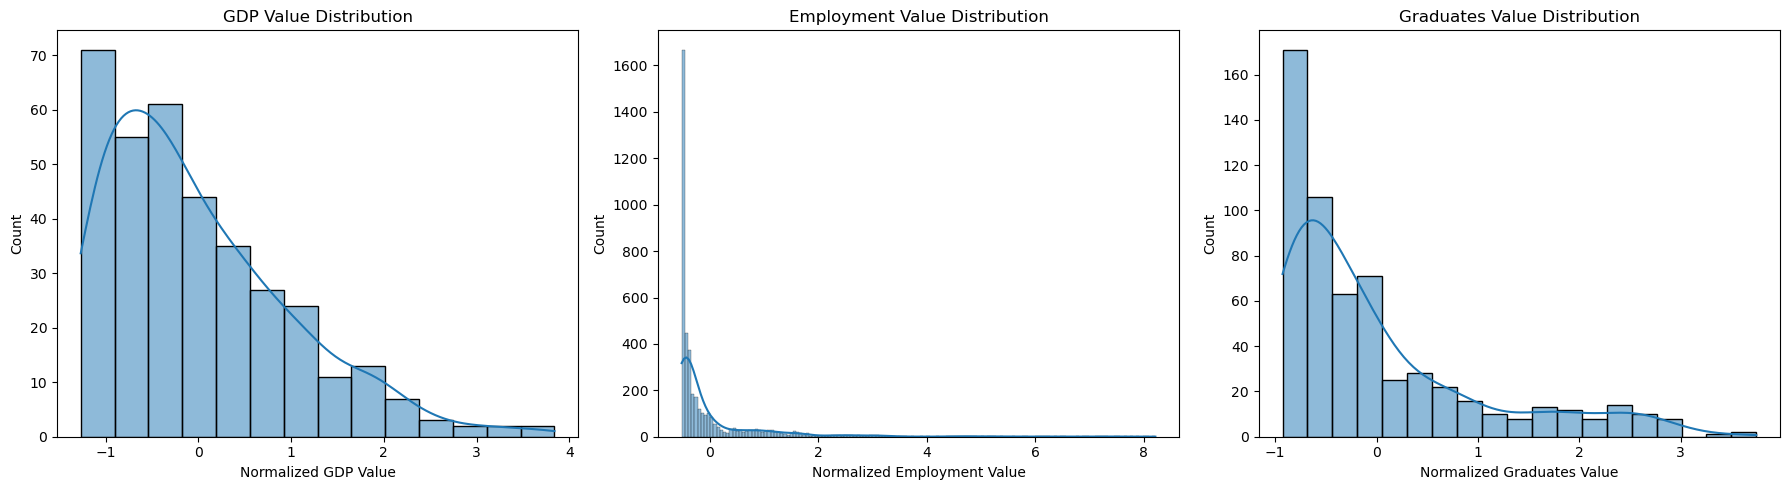

In [52]:
# Review changes after normalization for the DataFrames

# Set up the matplotlib figure
plt.figure(figsize=(18, 5))

# Histogram for the normalized 'Value' in the GDP DataFrame
plt.subplot(1, 3, 1)  # (rows, columns, panel number)
sns.histplot(gdp_df['Value'], kde=True)
plt.title('GDP Value Distribution')
plt.xlabel('Normalized GDP Value')

# Histogram for the normalized 'Value' in the Employment DataFrame
plt.subplot(1, 3, 2)
sns.histplot(employment_df['Value'], kde=True)
plt.title('Employment Value Distribution')
plt.xlabel('Normalized Employment Value')

# Histogram for the normalized 'Value' in the Graduates DataFrame
plt.subplot(1, 3, 3)
sns.histplot(graduates_df['Value'], kde=True)
plt.title('Graduates Value Distribution')
plt.xlabel('Normalized Graduates Value')

# Show the plot
plt.tight_layout()
plt.show()

## Detecting Outliers

In [53]:
from sklearn.svm import OneClassSVM

# Function to apply One-Class SVM and add an 'outlier' column to the DataFrame
def detect_outliers_with_ocsvm(df, nu_value):
    oc_svm = OneClassSVM(nu=nu_value, gamma='auto')
    oc_svm.fit(df[['Value']])
    df['outlier'] = oc_svm.predict(df[['Value']])
    return df

# Amount of contamination 
nu_value = 0.05  # This can be adjusted

# Detect outliers in the GDP DataFrame
gdp_df = detect_outliers_with_ocsvm(gdp_df, nu_value)

# Detect outliers in the Employment DataFrame
employment_df = detect_outliers_with_ocsvm(employment_df, nu_value)

# Detect outliers in the Graduates DataFrame
graduates_df = detect_outliers_with_ocsvm(graduates_df, nu_value)

# Now let's check the proportion of outliers detected in each dataset
print(f"Outliers detected in GDP data: {gdp_df['outlier'].value_counts(normalize=True) * 100}")
print(f"Outliers detected in Employment data: {employment_df['outlier'].value_counts(normalize=True) * 100}")
print(f"Outliers detected in Graduates data: {graduates_df['outlier'].value_counts(normalize=True) * 100}")


Outliers detected in GDP data:  1    89.635854
-1    10.364146
Name: outlier, dtype: float64
Outliers detected in Employment data:  1    96.031746
-1     3.968254
Name: outlier, dtype: float64
Outliers detected in Graduates data:  1    96.258503
-1     3.741497
Name: outlier, dtype: float64


In [ ]:
# Summary of the outliers section above will be included in the submitted pdf